# Scraping agent for ecommerce

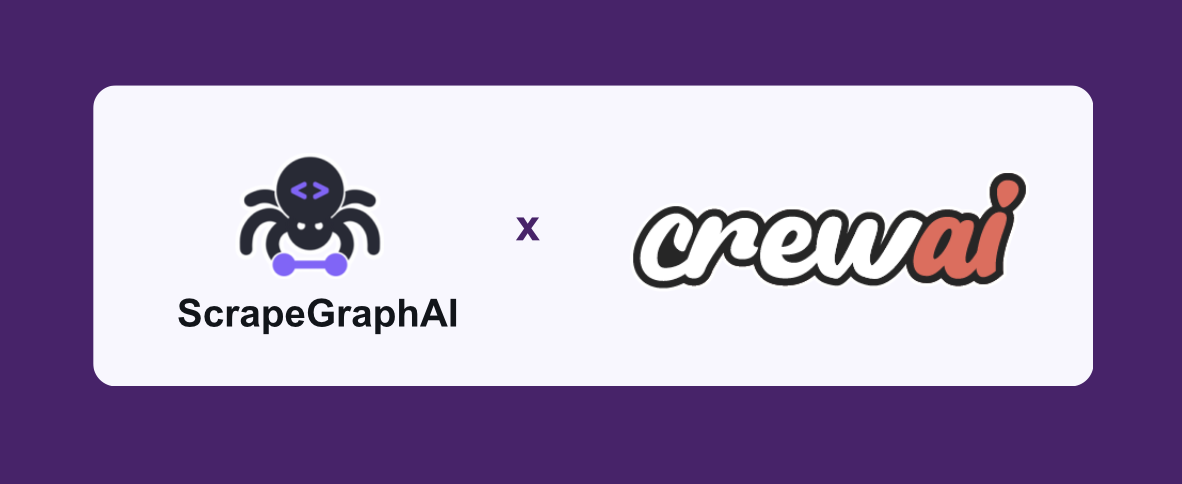

## Installation of the required libraries

In [ ]:
%%capture
!pip install crewai
!pip install crewai-tools

## Environment configuration

In [ ]:
import os
from getpass import getpass

# Check if the API key is already set in the environment
sgai_api_key = os.getenv("SCRAPEGRAPH_API_KEY")

if sgai_api_key:
    print("SCRAPEGRAPH_API_KEY found in environment.")
else:
    print("SCRAPEGRAPH_API_KEY not found in environment.")
    # Prompt the user to input the API key securely (hidden input)
    sgai_api_key = getpass("Please enter your SGAI_API_KEY: ").strip()
    if sgai_api_key:
        # Set the API key in the environment
        os.environ["SCRAPEGRAPH_API_KEY"] = sgai_api_key
        print("SCRAPEGRAPH_API_KEY has been set in the environment.")
    else:
        print("No API key entered. Please set the API key to continue.")

SCRAPEGRAPH_API_KEY found in environment.


In [ ]:
# Check if the API key is already set in the environment
sgai_api_key = os.getenv("OPENAI_API_KEY")

if sgai_api_key:
    print("OPENAI_API_KEY found in environment.")
else:
    print("OPENAI_API_KEY not found in environment.")
    # Prompt the user to input the API key securely (hidden input)
    sgai_api_key = getpass("Please enter your OPENAI_API_KEY: ").strip()
    if sgai_api_key:
        # Set the API key in the environment
        os.environ["OPENAI_API_KEY"] = sgai_api_key
        print("OPENAI_API_KEY has been set in the environment.")
    else:
        print("No API key entered. Please set the API key to continue.")

OPENAI_API_KEY found in environment.


## Imports

In [ ]:
from crewai import Agent, Crew, Process, Task
from crewai_tools import ScrapegraphScrapeTool

In [ ]:
website = "https://www.ebay.com/sch/i.html?_nkw=keyboard&_sacat=0&_from=R40&_trksid=p4432023.m570.l1313"
tool = ScrapegraphScrapeTool()

agent = Agent(
    role="Web Researcher",
    goal="Research and extract accurate information from websites",
    backstory="You are an expert web researcher with experience in extracting and analyzing information from various websites.",
    tools=[tool],
)

task = Task(
    name="scraping task",
    description=f"Visit the website {website} and extract detailed information about all the keyboards available.",
    expected_output="A file with the informations extracted from the website.",
    agent=agent,
)

crew = Crew(
    agents=[agent],
    tasks=[task],
)

res = crew.kickoff()

In [ ]:
res.raw

'{\n  "keyboards": [\n    {\n      "title": "Teclado para juegos SteelSeries Apex Pro TKL Gen 3 con cable certificado restaurado",\n      "price": "USD 164.99",\n      "seller_information": {\n        "seller_name": "gamesngadgetsplus",\n        "ratings": 3580,\n        "positive_feedback": "99.1%"\n      },\n      "item_specifics": {\n        "condition": "Restored",\n        "shipping_cost": "USD 63.74",\n        "shipping_origin": "United States"\n      },\n      "link": "https://www.ebay.com/itm/146284292952?_skw=keyboard&epid=14072039453&itmmeta=01JHZ2XD60HFYG3H2SGW3ZPD20&hash=item220f392b58:g:5NoAAOSw7ytnZb8d&itmprp=enc%3AAQAJAAAA4HoV3kP08IDx%2BKZ9MfhVJKnJnAISV9LpbsB4qVE8BPDpZj1d0167Ko%2FPBy31lCqIBYnInLHGEdjeLgwAL02glnIeEEqKoS8V3y38FHo2UIjJyTsghnHunyefi%2FEBvMC2cLNkeLXhfAORbJw3MAn4akA698gi%2FDHZRVsyYFpHdTlbNnmDWCY0Q9P9Fwen%2BFtKEK%2BFBGll8l%2F%2BfDJ1U5bOAA8iV65K2VaglTrW4CbrLvIABLQFhJAgq4wik7AiQpnRDahukAMx%2BX3VRfl8iGPeGPZ0WXJ93qe41x8cGWgH0ljL%7Ctkp%3ABFBMytP14o9l"\n    },\n    {